In [1]:
# load the autoreload extension
%reload_ext autoreload
# Set extension to reload modules every time before executing code
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

# Import random forest regressor and multioutput regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [2]:
path = '/mnt/data4/Abhishek/WP/'


In [3]:
def extractIndex(filename):
    return int(filename.split('_')[-1][:4])

In [4]:
f = np.loadtxt('/home/ajana/github/HODProject/parameters.txt')

In [5]:
random_data = []

for filename in os.listdir(path):
    if filename.startswith('wp_galaxies'):
        pos = extractIndex(filename)
        wp,_ = np.load(os.path.join(path,filename))
        _temp = np.concatenate((wp,f[pos]))
        random_data.append(_temp)

In [6]:
full_data = np.vstack((random_data))
del random_data
np.random.shuffle(full_data)

In [7]:
y_data = pd.DataFrame(full_data[:,:-5])
X_data = pd.DataFrame(full_data[:,-5:])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1,random_state=42)

In [9]:
y_train.shape

(4500, 30)

In [10]:
#fit Random Forest Regressor

reg_rf = RandomForestRegressor(
    n_estimators=3000,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
)

reg_rf.fit(X_train,y_train)
y_rf = reg_rf.predict(X_test)


In [11]:
mean_squared_error(y_rf,y_test,multioutput='raw_values',squared=False)

array([7.99008708e+00, 6.48190787e+00, 5.83114635e+00, 4.85284834e+00,
       4.51748588e+00, 4.10841689e+00, 3.64038656e+00, 3.37951385e+00,
       3.03929247e+00, 2.69451160e+00, 2.30585828e+00, 1.79429010e+00,
       1.18204007e+00, 7.11053289e-01, 3.92398464e-01, 1.94410293e-01,
       9.75179592e-02, 5.01079023e-02, 2.96580137e-02, 1.94080218e-02,
       1.43492353e-02, 1.04555599e-02, 7.60119389e-03, 5.49737724e-03,
       3.71904317e-03, 2.52989588e-03, 1.62976401e-03, 9.82305449e-04,
       5.51553611e-04, 3.30102235e-04])

In [12]:
print (np.mean(((y_rf - y_test)/y_test)*100, axis=0))

0     0.019846
1     0.022818
2     0.000304
3     0.013064
4     0.013607
5     0.019288
6     0.035533
7     0.050859
8     0.053180
9     0.061574
10    0.066319
11    0.060641
12    0.046811
13    0.038947
14    0.027142
15    0.016617
16    0.005285
17    0.006076
18    0.005223
19    0.006243
20    0.003457
21    0.002666
22    0.004225
23    0.011092
24    0.008372
25    0.012230
26    0.001276
27    0.002601
28    0.022803
29    0.009234
dtype: float64


In [14]:
import joblib
# save the model to disk
filename = 'wp_model.sav'
joblib.dump(reg_rf, filename)

['wp_model.sav']

In [15]:
def plot_corr(pred,test):
    sns.jointplot(pred.iloc[:,0],test.iloc[:,0],kind = "kde")
    sns.jointplot(pred.iloc[:,1],test.iloc[:,1],kind = 'kde',color='purple')
    sns.jointplot(pred.iloc[:,2],test.iloc[:,2],kind = 'kde',color='blue')
    sns.jointplot(pred.iloc[:,3],test.iloc[:,3],kind = 'kde',color='green')
    sns.jointplot(pred.iloc[:,4],test.iloc[:,4],kind = 'kde',color='red')
    plt.tight_layout
    
def plot_error(pred,test,dims=(12,8)):
    fig,ax = plt.subplots(figsize=dims)
    sns.distplot(pred.iloc[:,0]-test.iloc[:,0],color='blue',ax=ax,kde_kws={"label": "M_cut"})
    sns.distplot(pred.iloc[:,1]-test.iloc[:,1],color='cyan',ax=ax,kde_kws={"label": "M_1"})
    sns.distplot(pred.iloc[:,2]-test.iloc[:,2],color='purple',ax=ax,kde_kws={"label": "Sigma"})
    sns.distplot(pred.iloc[:,3]-test.iloc[:,3],color='yellow',ax=ax,kde_kws={"label": "Kappa"})
    sns.distplot(pred.iloc[:,4]-test.iloc[:,4],color='red',ax=ax,kde_kws={"label": "Alpha"})

In [18]:
y_rf = pd.DataFrame(y_rf)

y_test.reset_index(drop=True, inplace=True)
y_rf.reset_index(drop=True, inplace=True)


In [19]:
pd.concat([y_test,y_rf], axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,12.974556,14.049277,0.971249,1.398420,1.069863,13.098166,14.049845,1.039158,1.192181,1.035535
1,13.144944,13.973050,0.797184,1.066001,0.960682,13.137393,14.005769,0.782870,1.164510,0.996728
2,13.080000,14.060000,1.004321,1.130000,1.082326,13.053140,14.027712,0.994888,1.155452,1.031139
3,13.052881,14.121381,0.928205,0.920318,1.012150,13.085562,14.106732,0.941238,1.189031,0.974711
4,13.135534,14.019399,0.836362,1.234383,0.796927,13.085659,14.021427,0.810409,1.183903,0.817406
...,...,...,...,...,...,...,...,...,...,...
495,13.111058,14.041171,0.783494,1.070962,0.966682,13.125883,14.045602,0.786686,1.112239,0.959059
496,13.152577,14.101897,0.782755,1.246725,0.740676,13.130244,14.110928,0.777645,1.087752,0.805253
497,13.145813,13.964719,1.058436,1.154410,0.899699,13.118521,14.005437,1.042005,1.026102,0.982519
498,13.138191,14.078966,0.827614,1.487726,0.964888,13.090116,14.074979,0.808429,1.202456,0.985622


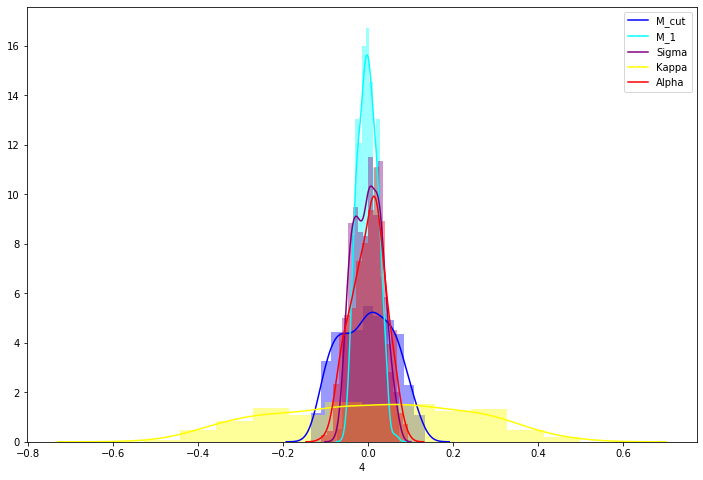

In [20]:
plot_error(y_rf,y_test)

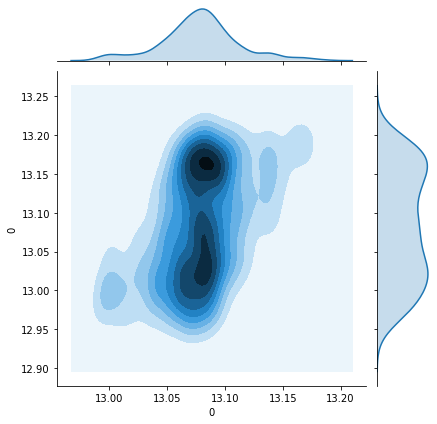

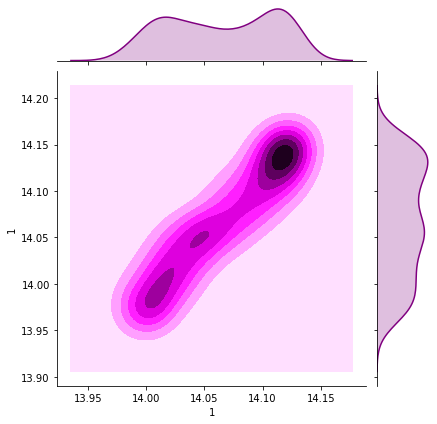

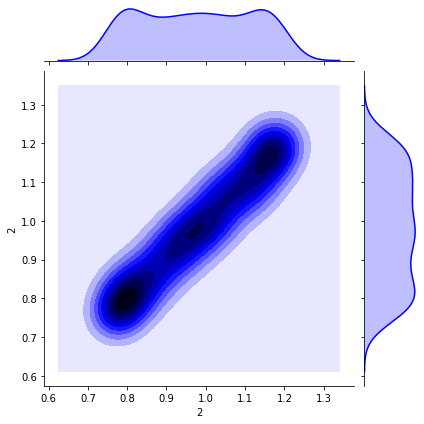

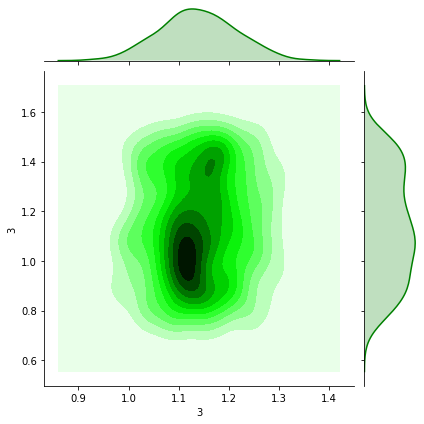

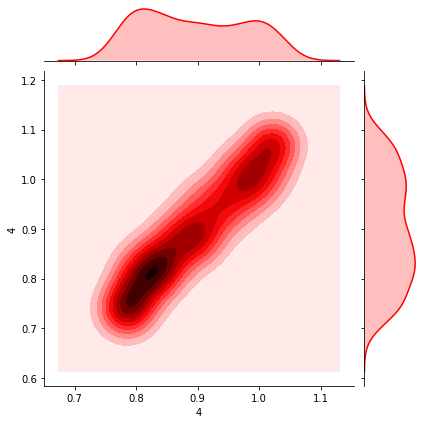

In [21]:
plot_corr(y_rf,y_test)

In [58]:
from xgboost import XGBRegressor

#good res for n_est = 10000, lr = 0.05

#fit multioutput regressor
multioutputregressor = MultiOutputRegressor(XGBRegressor(max_depth=1000,n_estimators=1000, 
                                                         learning_rate=0.01,
                                                         objective = 'reg:squarederror',
                                                         booster='gbtree',
                                                         n_jobs=-1,verbosity=1))
multioutputregressor.fit(X_train, y_train)
# predicting
y_multirf = multioutputregressor.predict(X_test)


In [59]:
print (np.mean((y_multirf - y_test)*100/(y_test), axis=0))
multioutputregressor.score(X_test,y_test)

0   -0.036125
1   -0.009872
2   -0.152739
3    3.450712
4   -0.045114
dtype: float64


0.5753112020849289

In [60]:
y_multirf = pd.DataFrame(y_multirf)
y_multirf.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [61]:
# Root Mean Squared error

print("y1 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,0], y_multirf.iloc[:,0]))) 
print("y2 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,1], y_multirf.iloc[:,1])))
print("y3 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,2], y_multirf.iloc[:,2]))) 
print("y4 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,3], y_multirf.iloc[:,3])))
print("y5 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,4], y_multirf.iloc[:,4]))) 

y1 MSE:0.0631
y2 MSE:0.0156
y3 MSE:0.0319
y4 MSE:0.2278
y5 MSE:0.0267


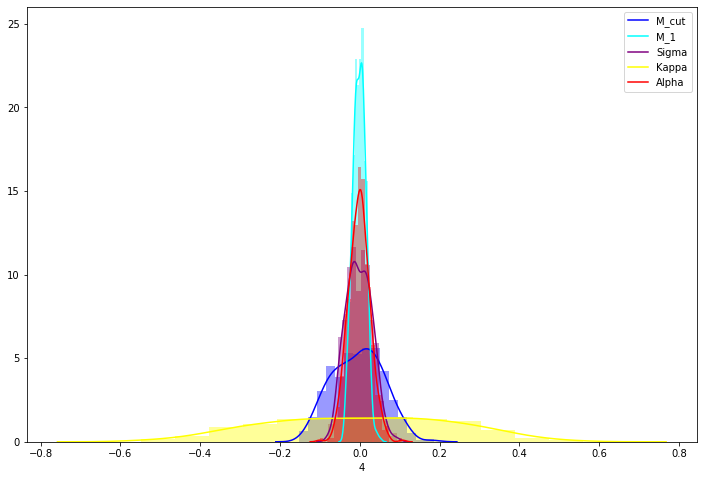

In [62]:
plot_error(y_multirf,y_test)

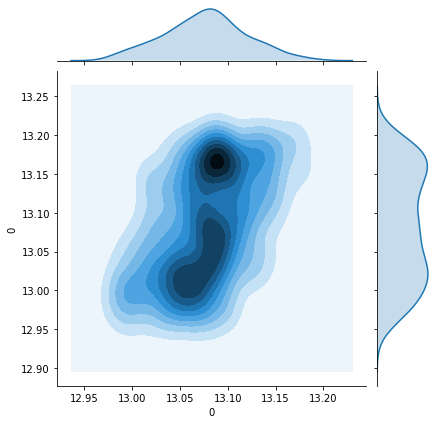

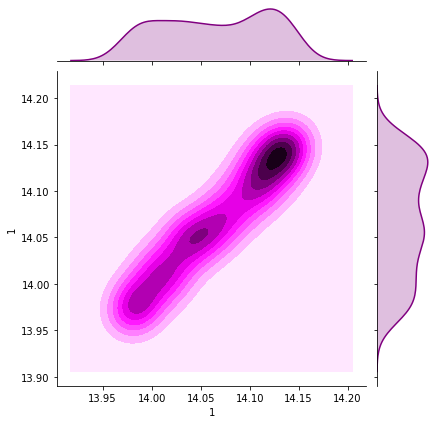

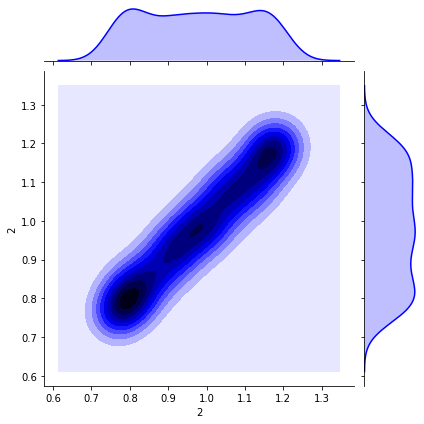

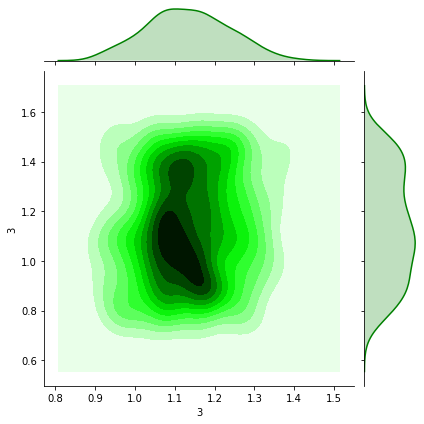

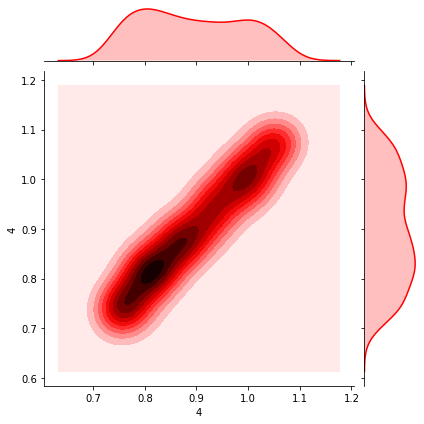

In [63]:
plot_corr(y_multirf,y_test)

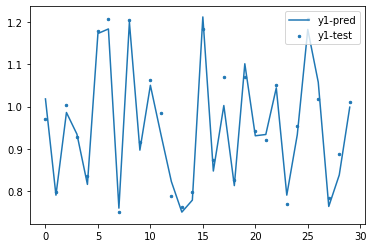

In [64]:
x_ax = range(len(X_test))
plt.scatter(x_ax[:30], y_test.iloc[:30,2],  s=6, label="y1-test")
plt.plot(x_ax[:30], y_multirf.iloc[:30,2], label="y1-pred")
#plt.scatter(x_ax[:20], y_test.iloc[:20,4],  s=6, label="y2-test")
#plt.plot(x_ax[:20], y_multirf.iloc[:20,4], label="y2-pred")
plt.legend()
plt.show()

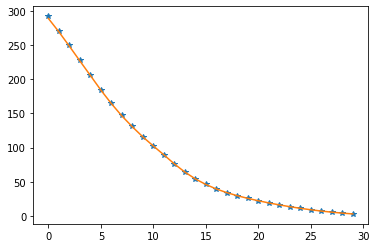

In [13]:
plt.plot(np.arange(30),y_test.iloc[2,:],'*')
plt.plot(np.arange(30),y_rf[2])

In [24]:
y_rf[0]

(29,)

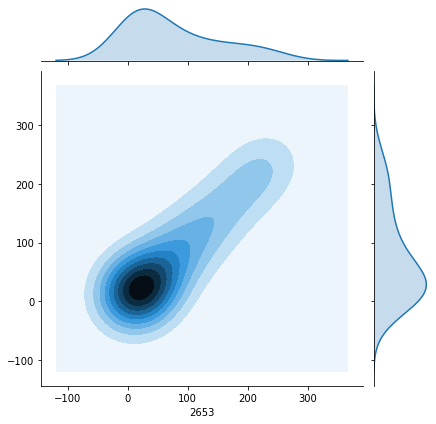

In [46]:
sns.jointplot(y_test.iloc[2,:],y_rf[2],kind='kde')